<a href="https://colab.research.google.com/github/OlegDenisenko/Data-analyst-Step1k/blob/main/3.%20A%D0%BDa%D0%BBu%D1%82u%D0%BA_%D0%B4a%D0%BD%D0%BD%D1%8B%D1%85_%D0%BE%D0%BF_St%D0%B5%D1%80uk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**А вот и наш первый минипроект :)**

In [1]:
import pandas as pd
import numpy as np
taxi = pd.read_csv('https://stepik.org/media/attachments/lesson/362441/taxi_peru.csv', sep=';')#

1) Сохраните данные, находящиеся в папке (taxi_peru.csv), в переменную taxi, разделитель – ;. Ваша задача положить в переменную  taxi_shape строку с информацией сколько линий и столбцов он имеет в следующем виде:
'taxi has y rows and x columns'
где y – число строк, а x – число колонок.

In [2]:
taxi.head(2)

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaN,iPhone,NaN,NaN


In [3]:
taxi.shape

(23111, 19)

In [4]:
taxi_shape = f'taxi has {taxi.shape[0]} rows and {taxi.shape[1]} columns'

In [5]:
print(taxi_shape )

taxi has 23111 rows and 19 columns


2) Положите в переменную na_number серию, в которой для каждой колонки указано сколько ячеек содержат пропущенные значения.

In [6]:
na_number = taxi.isna().sum()
na_number

journey_id              0
user_id                 0
driver_id            3385
taxi_id              3385
icon                    0
start_type              0
start_at                0
start_lat               0
start_lon               0
end_at                276
end_lat                 0
end_lon                 0
end_state              12
driver_start_lat     3490
driver_start_lon     3490
arrived_at           5395
source                123
driver_score        15461
rider_score          7721
dtype: int64

) Продолжим анализ данных по поездкам. Теперь посмотрим на колонки со временем!
Затем приведите столбцы start_at, end_at, arrived_at к формату даты, используя pd.to_datetime(). Отфильтруйте данные и оставьте наблюдения со статусом заказа "asap" и "reserved" (start_type) .

In [7]:
taxi[['start_at', 'end_at', 'arrived_at']] = taxi[['start_at', 'end_at', 'arrived_at']].apply(pd.to_datetime)

In [11]:
taxi = taxi.query('start_type == "asap" or start_type == "reserved"')

3) Сохраните в переменную df_types типы данных каждой колонки датафрэйма df.

In [8]:
taxi.dtypes

journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                        object
start_type                  object
start_at            datetime64[ns]
start_lat                   object
start_lon                   object
end_at              datetime64[ns]
end_lat                     object
end_lon                     object
end_state                   object
driver_start_lat            object
driver_start_lon            object
arrived_at          datetime64[ns]
source                      object
driver_score               float64
rider_score                float64
dtype: object

9) ⭐️Задание со звёздочкой!⭐️
Создайте колонку wait_time, в которой будет храниться разница между временем подачи машины (arrived_at) и временем заказа (start_at) в минутах. Чтобы сконвертировать полученный результат в минуты, можно использовать метод  .astype('timedelta64[m]')

In [14]:
taxi['wait_time'] = (taxi.arrived_at - taxi.start_at).astype('timedelta64[m]')

Посмотрим, какие водители опаздывали на заказы к определенному времени (start_type == 'reserved'). Опозданием считается время ожидания wait_time > 0.0.
Сгруппируйте отфильтрованные данные по driver_id и в качестве ответа укажите id водителя, который опоздал на заказ интересующего нас типа наибольшее число раз

In [32]:
driver_late = taxi.query('start_type == "reserved" and  wait_time > 0.0')\
              .groupby('driver_id').agg({'user_id': 'count'})\
              .sort_values('user_id', ascending = False)#.idxmax()

In [33]:
driver_late

,user_id
driver_id,
406921adcca37705ef527b4246c0cfea,67
d665fb9f75ef5d9cd0fd89479380ba78,59
ec84a73745199ff840ecafcb924383ad,57
56f59b58bcbbd1cdabc3652e713134c2,51
c814db2127582cf95dea1f74f43127c2,45
...,...
d7bf644eb441cda6127f91addebb85c4,1
b68895736389f2949faa8c73555b81ac,1
8cb98e46b27af1e6fca8768a2a6329f3,1


11) ⭐️Задание со звёздочкой!⭐️
Добавьте столбец month, где будет храниться месяц, в котором был сделан заказ (start_at), как номер, и столбец weekday – название дня недели. 

In [50]:
taxi['month'] = taxi['start_at'].dt.month_name()

In [39]:
taxi['weekday'] = taxi['start_at'].dt.day_name()

12) ⭐️Задание со звёздочкой!⭐️
Постройте график числа заказов по месяцам (month). Подумайте, с чем может быть связана полученная картина. 
Вопрос: в каком летнем месяце было сделано наименьшее число заказов? 

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


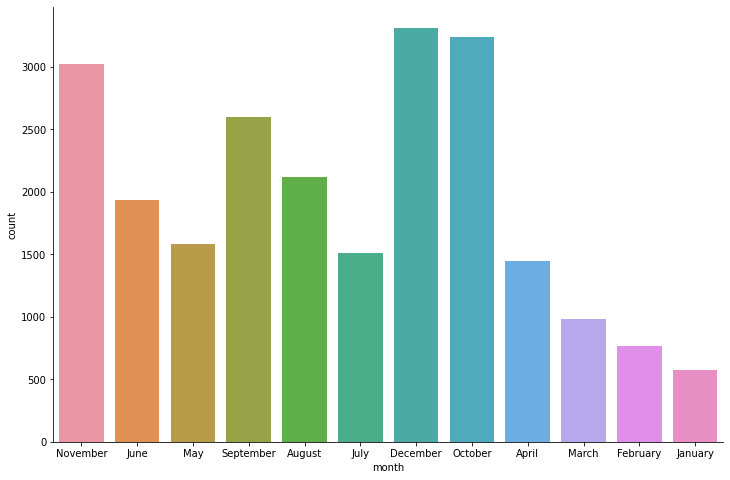

In [61]:
plt.figure(figsize= (12, 8));
sns.countplot(taxi.month);
sns.despine();

13) ⭐️Задание со звёздочкой!⭐️
А теперь – график по дням недели (weekday). Задать порядок столбиков на графике можно с помощью аргумента order, которому нужно передать список названий в нужном порядке. Например: 
sns.countplot(data['column'], order=['One', 'Two', 'Three'])
Вопрос: в какой день недели суммарно поступило меньше всего заказов?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


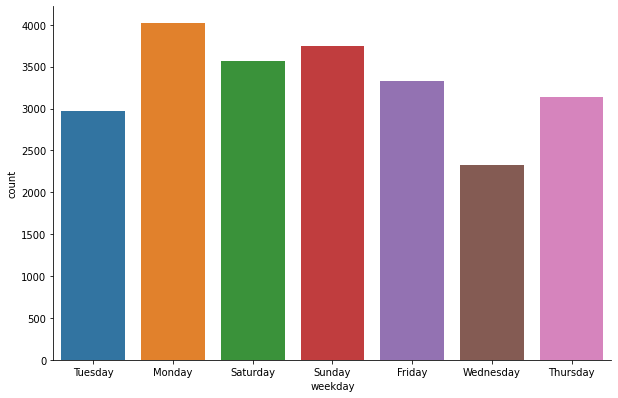

In [65]:
plt.figure(figsize= (10, 6.5));
sns.countplot(taxi.weekday);
sns.despine();